In [67]:
# Importing all the necessaries libraries

import os
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import scipy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import statistics as st
import statsmodels.api  as sm
from sklearn import svm

In [68]:
# This is the function definition of the Exo-SIR Model that we designed
# ODEs

def Exo_SIR_model(y, t, beta_x, beta_e, gamma):
    s, i_x, i_e, r = y
    
    i = i_x+i_e
    ds__dt = -beta_x*s-beta_e*s*i
    dix__dt = beta_x*s-gamma*i_x
    die__dt = beta_e*s*i-gamma*i_e
    dr__dt = gamma*i
    
    return([ds__dt, dix__dt, die__dt, dr__dt])

In [69]:
# This is the time series data which we're going to work on 

data = pd.read_csv('/content/Tamil Nadu_time_series.csv')
data

,Date,Daily Conf,Total Conf,Daily Rec,Total Rec,Daily Death,Total Death,DR,TR,Imported_daily,Imported_total,TB_DC,TB_TC
0,14 March,1,1,0,0,0,0,0,0,0,0,0,0
1,15 March,0,1,0,0,0,0,0,0,0,0,0,0
2,16 March,0,1,1,1,0,0,1,1,0,0,0,0
3,17 March,0,1,0,1,0,0,0,1,0,0,0,0
4,18 March,1,2,0,1,0,0,0,1,0,0,0,0
5,19 March,1,3,0,1,0,0,0,1,1,1,0,0
6,20 March,0,3,0,1,0,0,0,1,0,1,0,0
7,21 March,3,6,0,1,0,0,0,1,3,4,0,0
8,22 March,3,9,0,1,0,0,0,1,3,7,0,0
9,23 March,3,12,0,1,0,0,0,1,2,9,0,0


In [70]:
# Renaming the columns

data.columns = ['Date','DC','TC','Daily Recovered','Total Recovered','DD','TD','DR','TR','Imp_DC','Imp_TC','TB_DC','TB_TC']
data.head()

,Date,DC,TC,Daily Recovered,Total Recovered,DD,TD,DR,TR,Imp_DC,Imp_TC,TB_DC,TB_TC
0,14 March,1,1,0,0,0,0,0,0,0,0,0,0
1,15 March,0,1,0,0,0,0,0,0,0,0,0,0
2,16 March,0,1,1,1,0,0,1,1,0,0,0,0
3,17 March,0,1,0,1,0,0,0,1,0,0,0,0
4,18 March,1,2,0,1,0,0,0,1,0,0,0,0


In [71]:
data.Imp_DC[7:21]=0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [72]:
for i in range(1,len(data)):
  data.Imp_TC[i]=data.Imp_DC[i]+data.Imp_TC[i-1]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [73]:
data.Imp_DC

0     0
1     0
2     0
3     0
4     0
5     1
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
Name: Imp_DC, dtype: int64

In [74]:
data.Imp_TC

0     0
1     0
2     0
3     0
4     0
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    1
25    1
26    1
27    1
28    1
29    1
30    1
31    1
32    1
Name: Imp_TC, dtype: int64

In [75]:
# Calculating daywise S(susceptible number) adding it to the dataset

N = 75695000 # 7.56 Crores

Sus = N - data.TC - data.TR
data['S'] = Sus
data.head()

,Date,DC,TC,Daily Recovered,Total Recovered,DD,TD,DR,TR,Imp_DC,Imp_TC,TB_DC,TB_TC,S
0,14 March,1,1,0,0,0,0,0,0,0,0,0,0,75694999
1,15 March,0,1,0,0,0,0,0,0,0,0,0,0,75694999
2,16 March,0,1,1,1,0,0,1,1,0,0,0,0,75694998
3,17 March,0,1,0,1,0,0,0,1,0,0,0,0,75694998
4,18 March,1,2,0,1,0,0,0,1,0,0,0,0,75694997


In [76]:
# Adding fraction of susceptible number(s=S/N) column to the data set

sus = data.S/N
data['s'] = sus
data.head()

,Date,DC,TC,Daily Recovered,Total Recovered,DD,TD,DR,TR,Imp_DC,Imp_TC,TB_DC,TB_TC,S,s
0,14 March,1,1,0,0,0,0,0,0,0,0,0,0,75694999,1.0
1,15 March,0,1,0,0,0,0,0,0,0,0,0,0,75694999,1.0
2,16 March,0,1,1,1,0,0,1,1,0,0,0,0,75694998,1.0
3,17 March,0,1,0,1,0,0,0,1,0,0,0,0,75694998,1.0
4,18 March,1,2,0,1,0,0,0,1,0,0,0,0,75694997,1.0


In [77]:
# Adding I_X (number of exogenous infections), I_E(number of endogenous infections), i_x(fraction of I_X), i_e(fraction of I_E) 
# as columns to the dataset
# All the values being calculated are cumulative
# I_X = Imported infections + infections due to Tablighi Jamaat
# Total infections = I_X + I_E

I_X = data.Imp_TC + data.TB_TC
data['I_X'] = I_X
I_E = data.TC - data.I_X
data['I_E'] = I_E

i_x = I_X/N
i_e = I_E/N
data['i_x'] = i_x
data['i_e'] = i_e

data.head()

,Date,DC,TC,Daily Recovered,Total Recovered,DD,TD,DR,TR,Imp_DC,Imp_TC,TB_DC,TB_TC,S,s,I_X,I_E,i_x,i_e
0,14 March,1,1,0,0,0,0,0,0,0,0,0,0,75694999,1.0,0,1,0.0,1.321091e-08
1,15 March,0,1,0,0,0,0,0,0,0,0,0,0,75694999,1.0,0,1,0.0,1.321091e-08
2,16 March,0,1,1,1,0,0,1,1,0,0,0,0,75694998,1.0,0,1,0.0,1.321091e-08
3,17 March,0,1,0,1,0,0,0,1,0,0,0,0,75694998,1.0,0,1,0.0,1.321091e-08
4,18 March,1,2,0,1,0,0,0,1,0,0,0,0,75694997,1.0,0,2,0.0,2.642182e-08


In [78]:
# Adding i(fraction of cumulative infections), r(fraction of cumulative recoveries), di/dt(fraction of difference in cumulative infections i.e daily infections) 
# and dr/dt(similarly...fraction of daily recoveries) columns to the dataset
# as Number of cumulative values on nth day - Number of cumulative values on (n-1)th day = Number of new daily values on nth day

i = data.TC/N
data['i'] = i
r = data.TR/N
data['r'] = r

di_dt = data.DC/N
data['di_dt'] = di_dt
dr_dt = data.DR/N
data['dr_dt'] = dr_dt

data.head()

,Date,DC,TC,Daily Recovered,Total Recovered,DD,TD,DR,TR,Imp_DC,...,S,s,I_X,I_E,i_x,i_e,i,r,di_dt,dr_dt
0,14 March,1,1,0,0,0,0,0,0,0,...,75694999,1.0,0,1,0.0,1.321091e-08,1.321091e-08,0.000000e+00,1.321091e-08,0.000000e+00
1,15 March,0,1,0,0,0,0,0,0,0,...,75694999,1.0,0,1,0.0,1.321091e-08,1.321091e-08,0.000000e+00,0.000000e+00,0.000000e+00
2,16 March,0,1,1,1,0,0,1,1,0,...,75694998,1.0,0,1,0.0,1.321091e-08,1.321091e-08,1.321091e-08,0.000000e+00,1.321091e-08
3,17 March,0,1,0,1,0,0,0,1,0,...,75694998,1.0,0,1,0.0,1.321091e-08,1.321091e-08,1.321091e-08,0.000000e+00,0.000000e+00
4,18 March,1,2,0,1,0,0,0,1,0,...,75694997,1.0,0,2,0.0,2.642182e-08,2.642182e-08,1.321091e-08,1.321091e-08,0.000000e+00


In [79]:
# Adding the dix/dt(fraction of daily exogenous infections) and die/dt(fraction of daily endogenous infections) columns to the dataset

dix_dt = [0]
die_dt = [0]

for i in range(1,len(data)):
    temp1 = data.i_x[i]-data.i_x[i-1]
    temp2 = data.i_e[i]-data.i_e[i-1]
    
    if temp1>0:
        dix_dt.append(temp1)
    else:
        dix_dt.append(-1*temp1)
        
    if temp2>0:
        die_dt.append(temp2)
    else:
        die_dt.append(-1*temp2)
        
print(len(dix_dt))
print(len(die_dt))

data['dix_dt'] = dix_dt
data['die_dt'] = die_dt
data.head()

33
33


,Date,DC,TC,Daily Recovered,Total Recovered,DD,TD,DR,TR,Imp_DC,...,I_X,I_E,i_x,i_e,i,r,di_dt,dr_dt,dix_dt,die_dt
0,14 March,1,1,0,0,0,0,0,0,0,...,0,1,0.0,1.321091e-08,1.321091e-08,0.000000e+00,1.321091e-08,0.000000e+00,0.0,0.000000e+00
1,15 March,0,1,0,0,0,0,0,0,0,...,0,1,0.0,1.321091e-08,1.321091e-08,0.000000e+00,0.000000e+00,0.000000e+00,-0.0,-0.000000e+00
2,16 March,0,1,1,1,0,0,1,1,0,...,0,1,0.0,1.321091e-08,1.321091e-08,1.321091e-08,0.000000e+00,1.321091e-08,-0.0,-0.000000e+00
3,17 March,0,1,0,1,0,0,0,1,0,...,0,1,0.0,1.321091e-08,1.321091e-08,1.321091e-08,0.000000e+00,0.000000e+00,-0.0,-0.000000e+00
4,18 March,1,2,0,1,0,0,0,1,0,...,0,2,0.0,2.642182e-08,2.642182e-08,1.321091e-08,1.321091e-08,0.000000e+00,-0.0,1.321091e-08


In [109]:
# Subsetting the datframe to contain the range of dates required for analysis

df1 = data[17:]
df1

,Date,DC,TC,Daily Recovered,Total Recovered,DD,TD,DR,TR,Imp_DC,...,I_X,I_E,i_x,i_e,i,r,di_dt,dr_dt,dix_dt,die_dt
17,31 March,57,124,2,6,0,1,2,7,0,...,81,43,0.000001,5.680692e-07,0.000002,9.247639e-08,7.530220e-07,2.642182e-08,1.056873e-06,3.038510e-07
18,01 April,110,234,0,6,0,1,0,7,0,...,191,43,0.000003,5.680692e-07,0.000003,9.247639e-08,1.453200e-06,0.000000e+00,1.453200e-06,-0.000000e+00
19,02 April,75,309,0,6,0,1,0,7,0,...,265,44,0.000004,5.812801e-07,0.000004,9.247639e-08,9.908184e-07,0.000000e+00,9.776075e-07,1.321091e-08
20,03 April,102,411,0,6,0,1,0,7,0,...,365,46,0.000005,6.077020e-07,0.000005,9.247639e-08,1.347513e-06,0.000000e+00,1.321091e-06,2.642182e-08
21,04 April,74,485,2,8,2,3,4,11,0,...,438,47,0.000006,6.209129e-07,0.000006,1.453200e-07,9.776075e-07,5.284365e-08,9.643966e-07,1.321091e-08
22,05 April,86,571,0,8,2,5,2,13,0,...,523,48,0.000007,6.341238e-07,0.000008,1.717419e-07,1.136138e-06,2.642182e-08,1.122928e-06,1.321091e-08
23,06 April,50,621,5,13,1,6,6,19,0,...,571,50,0.000008,6.605456e-07,0.000008,2.510073e-07,6.605456e-07,7.926547e-08,6.341238e-07,2.642182e-08
24,07 April,69,690,6,19,1,7,7,26,0,...,634,56,0.000008,7.398111e-07,0.000009,3.434837e-07,9.115529e-07,9.247639e-08,8.322875e-07,7.926547e-08
25,08 April,48,738,2,21,1,8,3,29,0,...,676,62,0.000009,8.190766e-07,0.000010,3.831165e-07,6.341238e-07,3.963274e-08,5.548583e-07,7.926547e-08
26,09 April,96,834,6,27,0,8,6,35,0,...,760,74,0.000010,9.776075e-07,0.000011,4.623819e-07,1.268248e-06,7.926547e-08,1.109717e-06,1.585309e-07


In [110]:
# Calculating day-wise Gamma for the set of days

Gamma = df1.dr_dt/df1.i
print('daywise gamma for Tamil Nadu\n')
Gamma

daywise gamma for Tamil Nadu



17    0.016129
18    0.000000
19    0.000000
20    0.000000
21    0.008247
22    0.003503
23    0.009662
24    0.010145
25    0.004065
26    0.007194
27    0.019759
28    0.001032
29    0.006512
30    0.006820
31    0.019934
32    0.031401
dtype: float64

In [111]:
# Calculating day-wise Beta_x for the set of days

Beta_x = (df1.dix_dt+Gamma*df1.i_x) / df1.s
print('daywise beta_x for Tamil Nadu')
Beta_x

daywise beta_x for Tamil Nadu


17    1.074134e-06
18    1.453205e-06
19    9.776116e-07
20    1.321099e-06
21    1.012126e-06
22    1.147137e-06
23    7.070132e-07
24    9.172672e-07
25    5.911675e-07
26    1.181963e-06
27    1.154904e-06
28    6.328917e-07
29    1.219084e-06
30    1.297270e-06
31    5.607931e-07
32    9.096548e-07
dtype: float64

In [112]:
# Calculating day-wise Beta_e for the set of days

Beta_e = (df1.die_dt+Gamma*df1.i_e)/(df1.s*df1.i)
print('daywise beta_e for Tamil Nadu')
Beta_e

daywise beta_e for Tamil Nadu


17    0.191077
18    0.000000
19    0.003236
20    0.004866
21    0.002861
22    0.002046
23    0.003999
24    0.009519
25    0.008472
26    0.015027
27    0.008321
28    0.011449
29    0.019277
30    0.006654
31    0.010425
32    0.006558
dtype: float64

In [113]:
# Calculating mean of both Beta_x, Beta_e and Gamma for Tamil Nadu
 
beta_x_mean = st.mean(Beta_x)
beta_e_mean = st.mean(Beta_e)
gamma_mean = st.mean(Gamma)
print("the mean of Beta_x for TN \n",beta_x_mean)
print("the mean of Beta_e for TN \n",beta_e_mean)
print("the mean of Gamma for TN using actual cases\n",gamma_mean)

the mean of Beta_x for TN 
 1.0098325112709726e-06
the mean of Beta_e for TN 
 0.01898672023109981
the mean of Gamma for TN using actual cases
 0.009025118599215644


# Plotting the predictions

In [114]:
# Solving the ODEs using Scipy
# Assigning initial values of infections, recoveries & susceptibles along with the three parameters beta_x, beta_e and gamma
# all which are input to the Exo_SIR funtion

S0 = df1.loc[32,'s']
IX0 = df1.loc[32,'i_x']
IE0 = df1.loc[32,'i_e']
R0 = df1.loc[32,'r']
beta_x = beta_x_mean
beta_e = beta_e_mean
gamma = gamma_mean

# time vector
t = np.linspace(0, 3000, 3000)


# Result
solution1 = scipy.integrate.odeint(Exo_SIR_model,[S0, IX0, IE0, R0], t, args=(beta_x, beta_e, gamma))
solution1 = np.array(solution1)
print(S0)
print(IX0)
print(IE0)
print(R0)

0.9999818482066186
1.466411255697206e-05
1.743840412180461e-06
1.743840412180461e-06


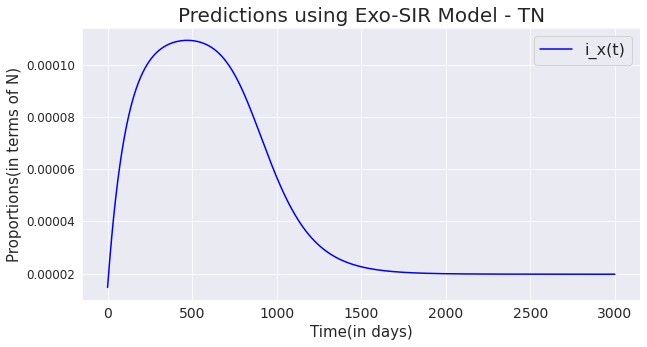

In [117]:
# Plotting the result

plt.figure(figsize = (10,5))
#plt.plot(t, solution1[:,0], label = 's(t)')
plt.plot(t, solution1[:,1], label = 'i_x(t)', c='blue')
#plt.plot(t, solution1[:,2], label = 'i_e(t)', c='orange')
#plt.plot(t, solution1[:,3], label = 'r(t)')

plt.legend(prop={'size': 16})
plt.title("Predictions using Exo-SIR Model - TN", size=20)
plt.xlabel("Time(in days)", size=15)
plt.ylabel("Proportions(in terms of N)", size=15)
plt.xticks(size=14)
plt.yticks(size=12)
#plt.savefig('E:\\Docs & Files\\SMA\\4. Exo-SIR Model\\pred_Exo-SIR_TN_i_x.png')
plt.show()